# Importing the required libraries

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [55]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
data = pd.read_csv('data.txt', sep=', ', header=None, names=columns)

# Drop the fnlwgt column
data = data.drop('fnlwgt', axis=1)

C:\Users\Youssef\AppData\Local\Temp/ipykernel_27524/2984815827.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('data.txt', sep=', ', header=None, names=columns)


In [56]:
# I want to count the number of ? characters in the each column
question_marks = data.isin(['?']).sum()

# Replace the ? characters with NaN
data = data.replace('?', np.nan)
data.dropna(inplace=True)

# Planning for Visualizations
## Feature Selection
We need to choose the number of features that we are continuing with (Need to be at least 8 variables)
1. Age
2. Workclass
3. Education
4. Maritial Status
5. Sex
6. Native Country
7. hours-per-week
8. Capital Gain

## User Stories
Define the 5 user stories that I want to use for the project. (At least, 3 of them must be mutli-variate)
1. Heat Map &#8594; (Native Country and Income) I CAN NOT DO THAT
    1. Useless plot
    2. The reason being that most entries are in the US
    3. I had to drop certain unsignificant columns from the dataframe
    4. All countries have had 1 or 2 entry except the US

2. Stacked Bar Chart &#8594; (Capital Gain and Income)
3. Mosaic Plot &#8594; (Sex and Income and Race possibly)
4. I could do a box and whisker plot &#8594; (HPW and salary)

In [57]:
# Split the data into the 2 dataframes one for the incomes less than and equal 50k and the other for the incomes greater than 50k
data_less_50k = data[data['income'] == '<=50K']
data_greater_50k = data[data['income'] == '>50K']

### Useloss plots & Reason

#### Heat Map (Native Country & Income)


I can mention:
1. Being able to look at different variables and what they look in different charts
2. Mention the issue of finding good visualizations when it comes to constinous datatypes
3. Mention being possibly deceived by having outliers in the data

Mention that the USA has most points by a long shot, so it doesn't really tell a story.

In [58]:
# These are the countries that we are keeping from the GeoDataFrame
countries_to_keep = [
    'United States of America', 'Cambodia', 'Puerto Rico', 'Canada', 'Germany',
    'India', 'Japan', 'Greece', 'China', 'Cuba', 'Iran', 'Honduras',
    'Philippines', 'Italy', 'Poland', 'Jamaica', 'Vietnam', 'Mexico',
    'Portugal', 'Ireland', 'France', 'Dominican Republic', 'Laos',
    'Ecuador', 'Taiwan', 'Haiti', 'Colombia', 'Hungary', 'Guatemala',
    'Nicaragua', 'Scotland', 'Thailand', 'Yugoslavia', 'El Salvador',
    'Trinidad and Tobago', 'Peru', 'Hong Kong']

# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the GeoDataFrame to keep only specified countries
filtered_world = world[world['name'].isin(countries_to_keep)]

C:\Users\Youssef\AppData\Local\Temp/ipykernel_27524/715938790.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [59]:
# Take the greater than 50k data and group it by the native country and count the number of people in each country
greater_50k_grouped = data_greater_50k.groupby('native-country').size().reset_index(name='counts')

# Rename the columns according to the GeoDataFrame

# Rename United-States to United States
greater_50k_grouped.loc[greater_50k_grouped['native-country'] == 'United-States', 'native-country'] = 'United States of America'
greater_50k_grouped.loc[greater_50k_grouped['native-country'] == 'Dominican-Republic', 'native-country'] = 'Dominican Rep.'
greater_50k_grouped.loc[greater_50k_grouped['native-country'] == 'Hong', 'native-country'] = 'Hong Kong'
greater_50k_grouped.loc[greater_50k_grouped['native-country'] == 'Trinadad&Tobago', 'native-country'] = 'Trinidad and Tobago'
# greater_50k_grouped.loc[greater_50k_grouped['native-country'] == 'Holand-Netherlands', 'native-country'] = 'Netherlands'
greater_50k_grouped.loc[greater_50k_grouped['native-country'] == 'El-Salvador', 'native-country'] = 'El Salvador'
greater_50k_grouped.loc[greater_50k_grouped['native-country'] == 'Puerto-Rico', 'native-country'] = 'Puerto Rico'
greater_50k_grouped.loc[greater_50k_grouped['native-country'] == 'Columbia', 'native-country'] = 'Colombia'

# Drop the rows with the countries that are not in not in the GeoDataFrame --> South, Outlying-US(Guam-USVI-etc), England
greater_50k_grouped = greater_50k_grouped[greater_50k_grouped['native-country'] != 'South']
greater_50k_grouped = greater_50k_grouped[greater_50k_grouped['native-country'] != 'Outlying-US(Guam-USVI-etc)']
greater_50k_grouped = greater_50k_grouped[greater_50k_grouped['native-country'] != 'England']

In [65]:
# Merging the datasets
filtered_world = filtered_world.rename(columns={'name': 'native-country'})  # Ensuring column names match for the merge
merged = filtered_world.merge(greater_50k_grouped, on='native-country', how='left')

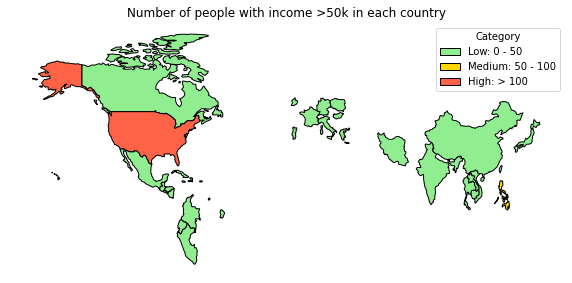

In [77]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Patch

# Example of categorizing into 3 bins with labels
bin_edges = [0, 50, 100, max(merged['counts'].max(), 200)]  # Adjust the bin edges as needed
bin_labels = ['Low', 'Medium', 'High']
merged['category'] = pd.cut(merged['counts'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Define colors for each category
category_colors = {
    'Low': 'lightgreen',
    'Medium': 'gold',
    'High': 'tomato'
}

# Plotting with a larger figure size, black borders, and a custom legend
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

legend_handles = []  # List to store legend handles

for i, (category, color) in enumerate(category_colors.items()):
    subset = merged[merged['category'] == category]
    
    # Create a custom label with category name and bin range
    if i < len(bin_labels) - 1:
        custom_label = f"{category}: {bin_edges[i]} - {bin_edges[i+1]}"
    else:
        # Handle the last category differently if necessary
        custom_label = f"{category}: > {bin_edges[i]}"
    
    # Plot each category
    subset.plot(ax=ax, label=custom_label, color=color, edgecolor='black')
    
    # Create a legend handle for the category
    legend_handles.append(Patch(facecolor=color, edgecolor='black', label=custom_label))

# Create custom legend
plt.legend(handles=legend_handles, title="Category")
plt.title('Number of people with income >50k in each country')
plt.axis('off')
plt.show()

<AxesSubplot:xlabel='native-country'>

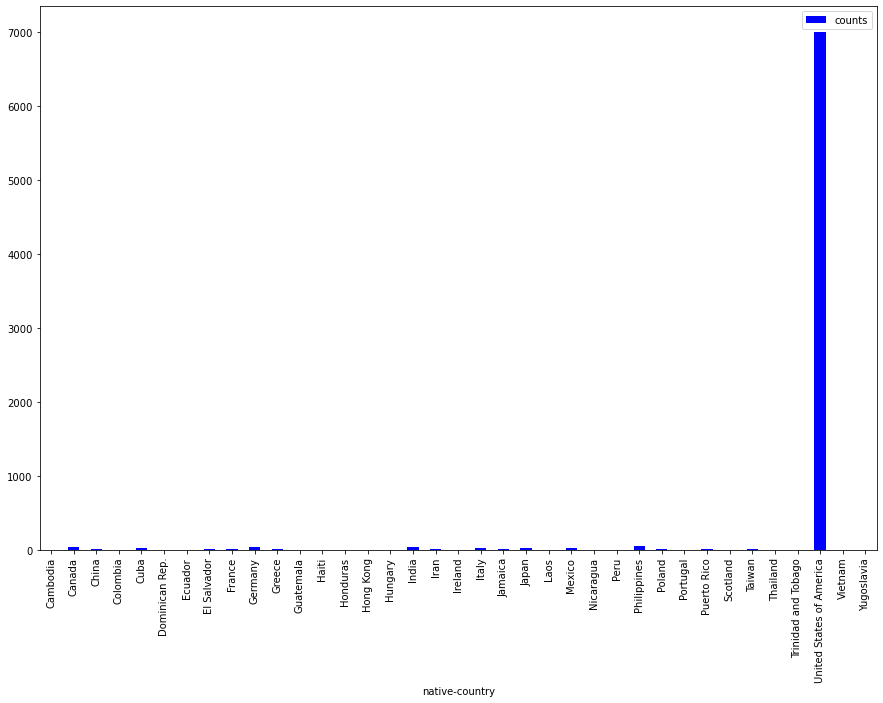

In [76]:
# Give me a bar plot of the number of people in each country with income greater than 50k without using the GeoDataFrame
greater_50k_grouped.plot.bar(x='native-country', y='counts', color='blue', figsize=(15, 10))

### Stacked Bar Chart (Native Country VS Income)

In [ ]:
# Make a set of the countries in the data
countries = set(data['native-country'])

# Make a dictionary of the countries and and their values would be an array [less_50k, greater_50k] which would be the number of people in each income category
country_income = {}
for country in countries:
    country_income[country] = [data_less_50k[data_less_50k['native-country'] == country].shape[0], data_greater_50k[data_greater_50k['native-country'] == country].shape[0]]

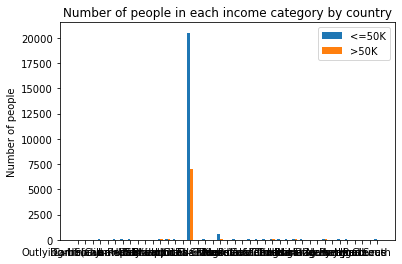

In [84]:
x = np.arange(len(countries))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, [country[0] for country in country_income.values()], width, label='<=50K')
rects2 = ax.bar(x + width/2, [country[1] for country in country_income.values()], width, label='>50K')

ax.set_ylabel('Number of people')
ax.set_title('Number of people in each income category by country')
ax.set_xticks(x)
ax.set_xticklabels(countries)
ax.legend()

plt.show()